In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

from dateutil.relativedelta import relativedelta
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# find first date
session.query(func.max(Measurement.date)).first()

('2017-08-23')

# Exploratory Climate Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [11]:
# Read the data and put into a dataframe
precip = session.query(Measurement)
precip
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql(precip.statement, precip.session.bind)
precip_df.head(10)
# Sort the dataframe by date
precip_df.sort_values('date')

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
9007,9008,USC00518838,2010-01-01,0.21,72.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
14959,14960,USC00511918,2010-01-01,0.05,66.0
16938,16939,USC00516128,2010-01-01,0.14,73.0
2724,2725,USC00513117,2010-01-01,0.28,67.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
9519,9520,USC00519523,2010-01-02,0.00,75.0
2725,2726,USC00513117,2010-01-02,0.00,65.0


In [70]:
# Calculate the date 1 year ago from the last data point in the database
from dateutil.relativedelta import relativedelta
date = session.query(func.max(Measurement.date)).all()
newest_date = date[0][0] 
newest_date = datetime.strptime(newest_date, '%Y-%m-%d')
end_date = newest_date - relativedelta(months=12)
print(end_date, newest_date)

2016-08-23 00:00:00 2017-08-23 00:00:00


In [13]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > end_date).all()
df = pd.DataFrame(results)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
months_of_precip_df = pd.DataFrame(results, columns=['date', 'precipitation'])

months_of_precip_df.set_index('date', inplace=True)
months_of_precip_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [15]:
# Sort the dataframe by date
months_of_precip_df.sort_index(inplace=True)

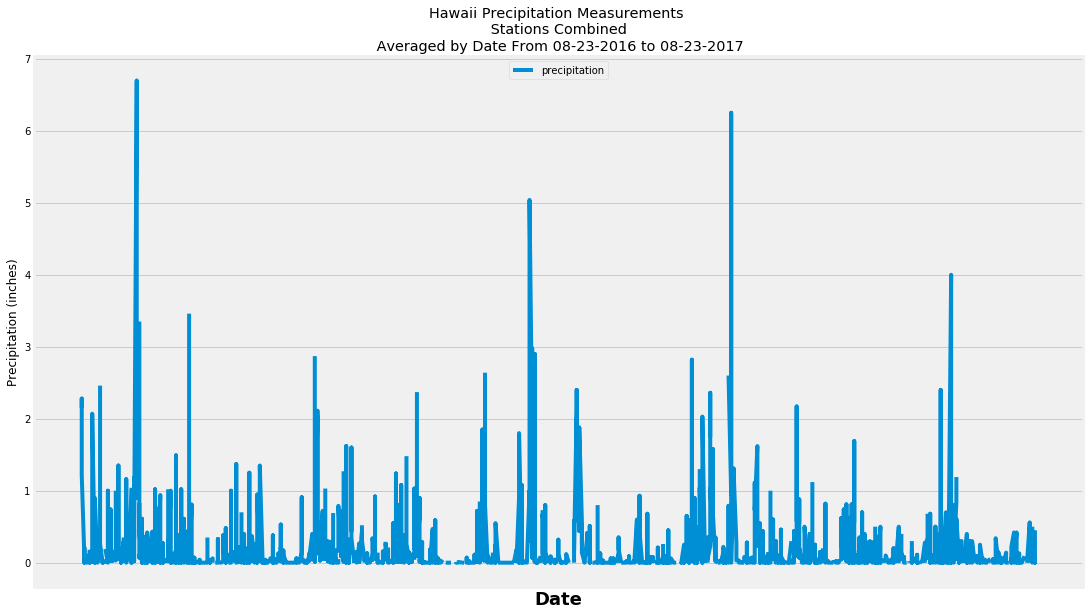

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
from matplotlib.pyplot import figure
plt.figure(figsize=(15,8))
plt.plot(months_of_precip_df.index.values, months_of_precip_df['precipitation'])
plt.legend(loc='upper right', fontsize='x-large')
plt.xlabel("Date", fontweight='bold', size=18)
plt.xticks([])
plt.legend(loc = 9)
plt.tight_layout()

plt.ylabel('Precipitation (inches)')
plt.savefig('last_year_precipitation.png')
plt.title("Hawaii Precipitation Measurements \n Stations Combined \n Averaged by Date From 08-23-2016 to 08-23-2017")
plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
months_of_precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(stations)

9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations2 = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
for value in stations2:
    print(value)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = stations2[0][0]

low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

print (f'The lowest temperature was {low}')
print (f'The highest temperature was {high}')
print (f'The average temperature was {avg}')

The lowest temperature was [(54.0,)]
The highest temperature was [(85.0,)]
The average temperature was [(71.66378066378067,)]


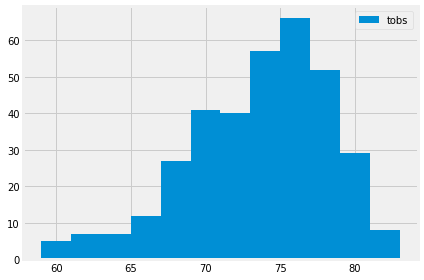

In [76]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.tobs).\
    filter(Measurement.date >= end_date).\
    filter(Measurement.station == most_active).all()
active_temps = pd.DataFrame(station_temps)

plt.hist(active_temps.tobs,bins=12)
plt.legend(["tobs"])
# plt.ylabel('Frequency')

plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
c = calc_temps('2017-01-01', '2018-01-01')
print(c)

[(58.0, 74.14387974230493, 87.0)]
